In [31]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os, csv, json
import pandas as pd
import scipy.optimize as sp
import itertools

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from scipy.ndimage import gaussian_filter1d
import scipy.signal as sg

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl

%run /home/guaravtenkila/Disorder_sims/Ising_RSRG/aux_funcs.py
%run /home/guaravtenkila/Disorder_sims/Ising_RSRG/RSRG_class.py
%run /home/guaravtenkila/Disorder_sims/Ising_RSRG/bdry_log_aux_funcs.py

In [1]:
#run_dir = "mag_ratio_bdry_fine/"
run_dir = "/home/guaravtenkila/Disorder_sims/Ising_RSRG/log_bdry_output/bdry_sweep_pass3/"

log_file = pd.read_csv(run_dir+"bdry_log_file.csv")
ts_list = log_file['ts'].tolist()
#log_file['L'].tolist()
selected_files = log_file
selected_files

ts_list = selected_files['ts'].tolist()
n_runs_list = selected_files['n_runs'].tolist()
L_list = selected_files['L'].tolist()

selected_files

NameError: name 'pd' is not defined

In [70]:
fixed_length_slice = log_file[lambda df: (df['L'] == '(40, 20)')]
#fixed_length_slice = log_file[log_file['L'] == '(40, 20)']
eval(fixed_length_slice['L'][0])

(40, 20)

In [44]:
#L_list = [40, 60, 80, 100, 120, 150]
c_dict = {150:'red', 120:'blue', 60:'green', 80:'cyan', 40:'orange', 100:'magenta', 42:'brown'}
L_list = [20, 40]

w_vals_comp = []
lcs_comp = []
lcs_bdry_comp = []
var_lcs_comp = []

for L in L_list:
    fixed_length_slice = log_file[lambda df: (df['L'] == '('+str(L)+', 20)')]
    #fixed_length_slice = log_file[lambda df: (df['L'] == L+1)]
    #fixed_length_slice = log_file[lambda df: (df['L'] == L)]
    ts_list = fixed_length_slice['ts'].tolist()
    w_vals = fixed_length_slice['w_bdry'].tolist()
    largest_clust_size = []
    largest_clust_size_bdry = []
    var_lcs = [] 
    c_list = []
    

    for index, ts in enumerate(ts_list):

        with open(run_dir+"LIsingB_2D_clusters_"+str(ts)+".pkl", "rb") as fp:   
            clust_list_final = pickle.load(fp)

        #print(input_dict)
        clust_dict_list, reverse_dict_list, bdry_dict_list = [], [], []

        for core_pair in clust_list_final:
            clust_list_temp = core_pair[0]
            reverse_list_temp = core_pair[1]
            bdry_temp = core_pair[2]
            clust_dict_list+=clust_list_temp
            reverse_dict_list+=reverse_list_temp
            bdry_dict_list+=bdry_temp
            
        largest_clust_list_bdry = np.array([max([len(clust) for clust in reverse_dict.values() if clust is not None and bdry_dict_list[i][clust[0]]]) for i,reverse_dict in enumerate(reverse_dict_list)])
        
        largest_clust_list = np.array([max([0]+[len(clust) for clust in reverse_dict.values() if clust is not None]) for reverse_dict in reverse_dict_list])

        
        largest_clust_size.append(largest_clust_list.mean()/L**2)
        largest_clust_size_bdry.append(largest_clust_list_bdry.mean()/L**2)
        var_lcs.append(largest_clust_list.std()/L**2)
        #c_list.append(c_dict[L])
    
    w_vals_comp.append(w_vals)
    lcs_comp.append(largest_clust_size)
    lcs_bdry_comp.append(largest_clust_size_bdry)
    var_lcs_comp.append(var_lcs)

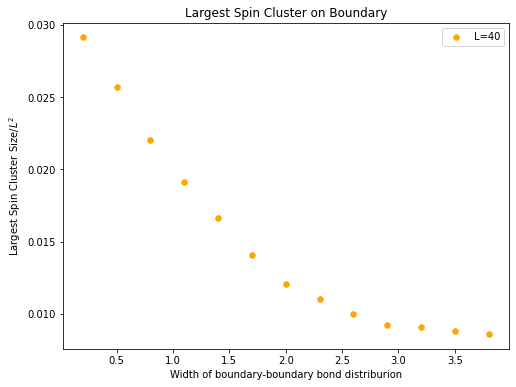

In [45]:
plt.figure(figsize=(8, 6))
for i, L in enumerate(L_list):
    plt.scatter(w_vals_comp[i], lcs_comp[i], c=c_dict[L], label='L='+str(L), s=30)
    #plt.scatter(w_vals_comp[i], lcs_bdry_comp[i], c=c_dict[L], label='L='+str(L), marker='x')
    #plt.scatter(w_vals_comp[i], var_lcs_comp[i], c=c_dict[L], marker='s')
    
    #plt.scatter(set_49_runs[0][i], set_49_runs[1][i], c=c_dict[L], label='L='+str(L), marker='o', s=30)
    #plt.scatter(set_50_runs[0][i], set_50_runs[1][i], c=c_dict[L], marker='^', s=30)
    #plt.scatter(set_51_runs[0][i], set_51_runs[1][i], c=c_dict[L], marker='s', s=30)
    
    
plt.ylabel("Largest Spin Cluster Size/$L^2$")
plt.xlabel("Width of boundary-boundary bond distriburion")
plt.title("Largest Spin Cluster on Boundary")
#plt.xlim(4.5, 5.5)
#plt.ylim(0, 0.1)
plt.legend()

In [28]:
#L_list = [40, 60, 80, 100, 120, 150]
c_dict = {150:'red', 120:'blue', 60:'green', 80:'cyan', 40:'orange', 100:'magenta', 50:'brown'}
L_list = [80, 120]

w_vals_comp = []
cs_comp = []
cs_bdry_comp = []
var_cs_comp = []

for L in L_list:
    fixed_length_slice = log_file[lambda df: (df['L'] == '('+str(L)+', 50)')]
    #fixed_length_slice = log_file[lambda df: (df['L'] == L+1)]
    #fixed_length_slice = log_file[lambda df: (df['L'] == L)]
    ts_list = fixed_length_slice['ts'].tolist()
    w_vals = fixed_length_slice['w_bdry'].tolist()
    clust_size = []
    clust_size_bdry = []
    var_cs = [] 
    c_list = []
    

    for index, ts in enumerate(ts_list):

        with open(run_dir+"LIsingB_2D_clusters_"+str(ts)+".pkl", "rb") as fp:   
            clust_list_final = pickle.load(fp)

        #print(input_dict)
        clust_dict_list, reverse_dict_list, bdry_dict_list = [], [], []

        for core_pair in clust_list_final:
            clust_list_temp = core_pair[0]
            reverse_list_temp = core_pair[1]
            bdry_temp = core_pair[2]
            clust_dict_list+=clust_list_temp
            reverse_dict_list+=reverse_list_temp
            bdry_dict_list+=bdry_temp
            
        clust_list_bdry = np.concatenate([[len(clust) for clust in reverse_dict.values() if clust is not None and bdry_dict_list[i][clust[0]]] for i,reverse_dict in enumerate(reverse_dict_list)])
        
        clust_list = np.concatenate([[0]+[len(clust) for clust in reverse_dict.values() if clust is not None] for reverse_dict in reverse_dict_list])

        
        clust_size.append(clust_list.mean()/L**2)
        clust_size_bdry.append(clust_list_bdry.mean()/L**2)
        var_cs.append(clust_list.std()/L**2)
        #c_list.append(c_dict[L])
    
    w_vals_comp.append(w_vals)
    cs_comp.append(clust_size)
    cs_bdry_comp.append(clust_size_bdry)
    var_cs_comp.append(var_cs)

KeyboardInterrupt: 

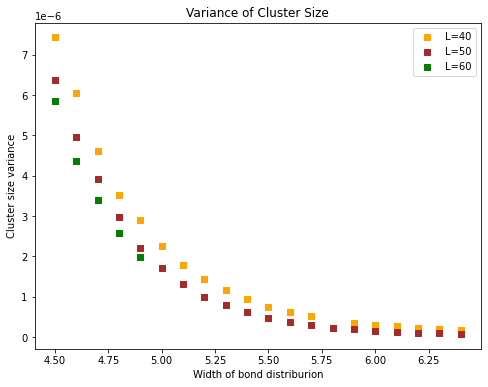

In [25]:
plt.figure(figsize=(8, 6))
for i, L in enumerate(L_list):
    #plt.scatter(w_vals_comp[i], cs_comp[i], c=c_dict[L], label='L='+str(L), s=30)
    #plt.scatter(w_vals_comp[i], cs_bdry_comp[i], c=c_dict[L], label='L='+str(L), marker='x')
    plt.scatter(w_vals_comp[i], np.array(var_cs_comp[i])**2, c=c_dict[L], label='L='+str(L), marker='s')
    
    #plt.scatter(set_49_runs[0][i], set_49_runs[1][i], c=c_dict[L], label='L='+str(L), marker='o', s=30)
    #plt.scatter(set_50_runs[0][i], set_50_runs[1][i], c=c_dict[L], marker='^', s=30)
    #plt.scatter(set_51_runs[0][i], set_51_runs[1][i], c=c_dict[L], marker='s', s=30)
    
    
plt.ylabel("Cluster size variance")
plt.xlabel("Width of bond distriburion")
plt.title("Variance of Cluster Size")
#plt.xlim(4.5, 5.5)
#plt.ylim(0, 0.1)
plt.legend()

In [3]:
L_list = [40]#, 70, 85, 50]
clust_size_list_comp = []
clust_size_list_bdry_comp = []
w_vals_comp = []
run_dir = "bulk_crit_rerun/"
log_file = pd.read_csv(run_dir+"bdry_log_file.csv")

for L in L_list:
    fixed_length_slice = log_file[lambda df: (df['L'] == L)]
    ts_list = fixed_length_slice['ts'].tolist()

    w_vals = fixed_length_slice['w_blk'].tolist()
    clust_size_list = []
    clust_size_list_alt = []
    clust_dict_list_bdry = []
    

    for index, ts in enumerate(ts_list):

        with open(run_dir+"LIsingB_2D_clusters_"+str(ts)+".pkl", "rb") as fp:   
            clust_list_final = pickle.load(fp)

        #print(input_dict)
        clust_dict_list, reverse_dict_list, bdry_dict_list = [], [], []

        for core_pair in clust_list_final:
            clust_list_temp = core_pair[0]
            reverse_list_temp = core_pair[1]
            bdry_list_temp = core_pair[2]
            clust_dict_list+=clust_list_temp
            reverse_dict_list+=reverse_list_temp
            bdry_dict_list+=bdry_list_temp
        
        #Below is for all spins, boundary and not on boundary
        clust_sizes = np.array(list(itertools.chain.from_iterable([[len(clust) for clust in rd.values() if clust is not None] for rd in reverse_dict_list])))
        
        #List of sizes of all clusters normalized to system size
        
        #Below is for spins exclusively on the boundary
        clust_sizes_bdry = extract_cluster_sizes(reverse_dict_list, bdry_dict_list, on_bdry=True)
        
        #Below is for spins exclusively not on the boundary
        #clust_sizes = extract_cluster_sizes(reverse_dict_list, bdry_dict_list)
        
        
        clust_size_list.append(clust_sizes[clust_sizes!=1]/L**2)
        clust_dict_list_bdry.append(clust_sizes_bdry[clust_sizes_bdry!=1]/L**2)
    w_vals_comp.append(w_vals)
    clust_size_list_comp.append(clust_size_list)
    clust_size_list_bdry_comp.append(clust_dict_list_bdry)

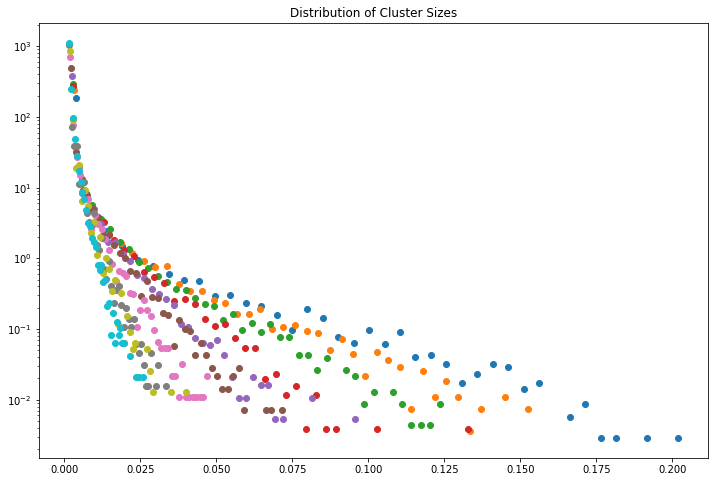

In [7]:
fig, ax0 = plt.subplots(figsize=(12, 8))

c_dict = {50:'red', 70:'blue', 60:'green', 80:'cyan', 40:'orange', 100:'magenta', 85:'orange'}
cmap_type = {50:'Greens', 60:'Blues', 40:'Reds', 100:'Greys'}
for ind, L in enumerate(L_list):
    curve_check = []
    curve_check_bdry = []
    mean_clust_size = []
    cdf_max = []
    for index, w in enumerate(w_vals_comp[ind]):
        if not index%2==0: continue
        #if not index==3: continue    
        cmap_L = cm.get_cmap(cmap_type[L])
        norm = plt.Normalize(1, 4)
        hist, bin_edges = np.histogram(clust_size_list_comp[ind][index], density=True, bins=40)
        width = bin_edges[1]-bin_edges[0]
        x = bin_edges[1:]-width/2
        ax0.scatter(x, hist)
        
        infl_size = get_distribution_curvature(hist, bin_edges)
        curve_check.append(infl_size)
        
        hist, bin_edges = np.histogram(clust_size_list_bdry_comp[ind][index], density=True, bins=40)
        width = bin_edges[1]-bin_edges[0]
        x = bin_edges[1:]-width/2
        #ax0.plot(x, hist, marker='x', linestyle='')
        cdf = np.cumsum(hist)
        smooth = gaussian_filter1d(cdf, 1)
        second_der = np.gradient(np.gradient(smooth))
        a = np.diff(np.sign(np.diff(second_der))).nonzero()[0] + 1
        infl_size = second_der[a[-2]]-second_der[a[-1]]
        curve_check_bdry.append(infl_size)
    
    #ax0.plot(w_vals_comp[ind], mean_clust_size, c=c_dict[L], marker='o')
    #ax0.scatter(w_vals_comp[ind], cdf_max, c=c_dict[L], marker='o')
    #ax0.scatter(w_vals_comp[ind], curve_check, c=c_dict[L], marker='o')
    #ax0.scatter(w_vals_comp[ind], curve_check_bdry, c=c_dict[L], marker='x')
    #fig, ax = plt.subplots(figsize=(6, 1))
    #fig.subplots_adjust(bottom=0.5)
    #cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap_L,
    #                            norm=norm,
    #                            orientation='horizontal')
    
ax0.set_title("Distribution of Cluster Sizes")
#ax0.xscale('log')
ax0.set_yscale('log')
#plt.legend()
#plt.xlim(2,4)

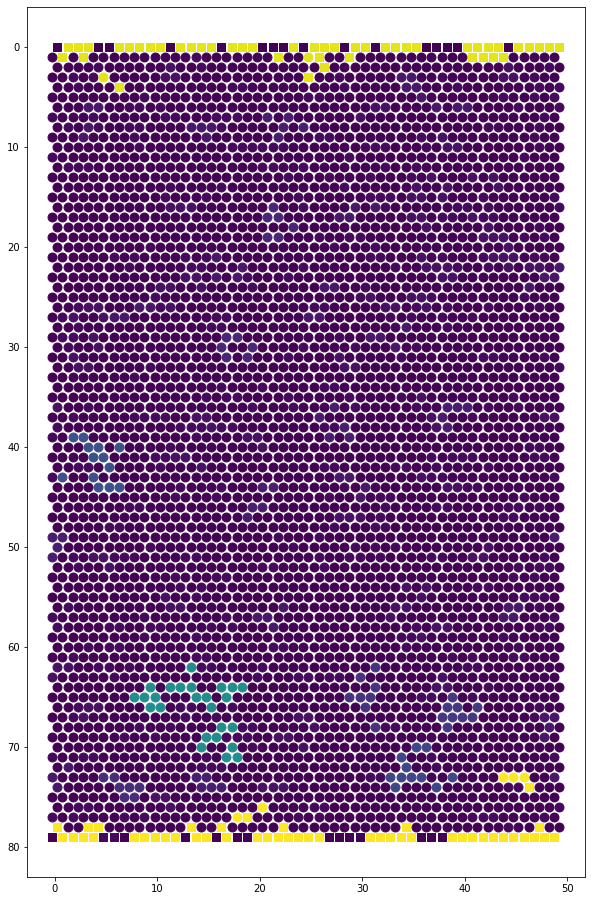

In [42]:
import matplotlib as mpl
import matplotlib.cm as cm

run_dir = "rect_bdry_sweep/"
log_file = pd.read_csv(run_dir+"bdry_log_file.csv")
#L = 40
#fixed_log_slice = log_file[lambda df: (df['L'] == L)]
Lx, Ly = 80, 50
rect_side = "(%d, %d)"%(Lx, Ly)
fixed_log_slice = log_file[lambda df: (df['L']==rect_side)]
ts_list = fixed_log_slice['ts'].tolist()
ts = str(ts_list[0])


with open(run_dir+"LIsingB_2D_clusters_"+ts+".pkl", "rb") as fp:   
    clust_list_final = pickle.load(fp)

plt.figure(figsize=(10, 16))
clust_dict = clust_list_final[1][0][0]
reverse_dict = clust_list_final[1][1][0]
bdry_dict = clust_list_final[1][2][0]

clust_size_list = [len(clust) for clust in reverse_dict.values() if clust is not None]
norm = mpl.colors.Normalize(vmin=1, vmax=max(clust_size_list))
cmap = 'viridis'#cm.hsv
m = cm.ScalarMappable(norm=norm, cmap=cmap)

#Lx, Ly = L, L
for x in range(Lx):
    for y in range(Ly):
        
        site_ind = index_map_rect(x, y, Lx, Ly)
        #print(x, y, site_ind)
        """
        if clust_dict[site_ind] == site_ind: c='blue'
        else: 
            c = m.cmap(len(reverse_dict[clust_dict[site_ind]]))
        """
        c = m.cmap(norm(len(reverse_dict[clust_dict[site_ind]])))
        if bdry_dict[site_ind]: m_type, c_type = 's', 'r'
        else: m_type, c_type= 'o', 'b'
        plt.scatter(y+(0.25*(-1)**(x%2)), x, color=c, s= 80, marker=m_type)
        #plt.scatter(y+(0.25*(-1)**(x%2)), x, s= 80, c=c_type)

    
plt.gca().invert_yaxis()
#plt.savefig('clustered_boundary.png')

In [63]:
def index_map_rect(x, y, Lx, Ly):
    if x>Lx or y>Ly: return None
    return x*Ly + y


['5669970212010.063.0', '5689538912012.063.0', '5690723712014.063.0']